<a href="https://colab.research.google.com/github/Zh5rakib/data-science-portfolio/blob/main/02-diabetes-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

scikit-learn: 1.6.1
Best alpha: 1.0
MSE: 2892.015  RMSE: 53.777  R2: 0.454
Baseline R2: -0.012


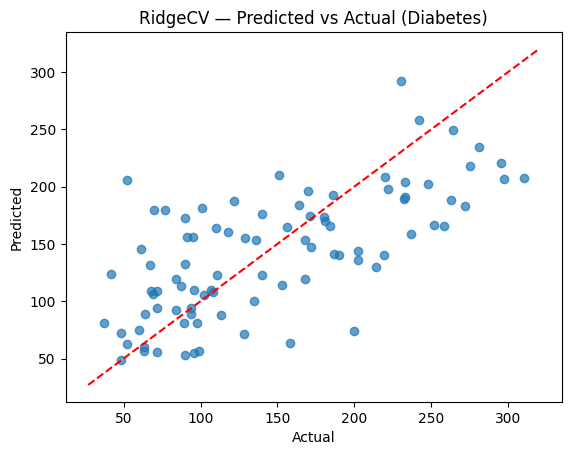

In [2]:
# Project 2 (robust) — Diabetes Regression with RidgeCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics as skm
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

print("scikit-learn:", sklearn.__version__)

# 1) Load
data = load_diabetes(as_frame=True)
X = data.frame.drop(columns=["target"])
y = data.target

# 2) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Model (deterministic CV)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = np.logspace(-3, 3, 13)

model = Pipeline([
    ("scale", StandardScaler()),
    ("ridge", RidgeCV(alphas=alphas, cv=cv))
])

# 4) Fit + Predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 5) Metrics (no 'squared' kwarg)
mse = skm.mean_squared_error(y_test, y_pred)        # always available
rmse = float(np.sqrt(mse))
r2 = skm.r2_score(y_test, y_pred)

print("Best alpha:", model.named_steps["ridge"].alpha_)
print(f"MSE: {mse:.3f}  RMSE: {rmse:.3f}  R2: {r2:.3f}")

# 6) Baseline
baseline_pred = np.full(len(y_test), y_train.mean(), dtype=float)
baseline_r2 = skm.r2_score(y_test, baseline_pred)
print(f"Baseline R2: {baseline_r2:.3f}")

# 7) Plot
plt.scatter(y_test, y_pred, alpha=0.7)
lims = [y_test.min()-10, y_test.max()+10]
plt.plot(lims, lims, "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RidgeCV — Predicted vs Actual (Diabetes)")
plt.show()